In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the Data

In [2]:
Df=pd.read_csv('health care diabetes.csv')
Df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
Df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Histogram to see the distribution of the data


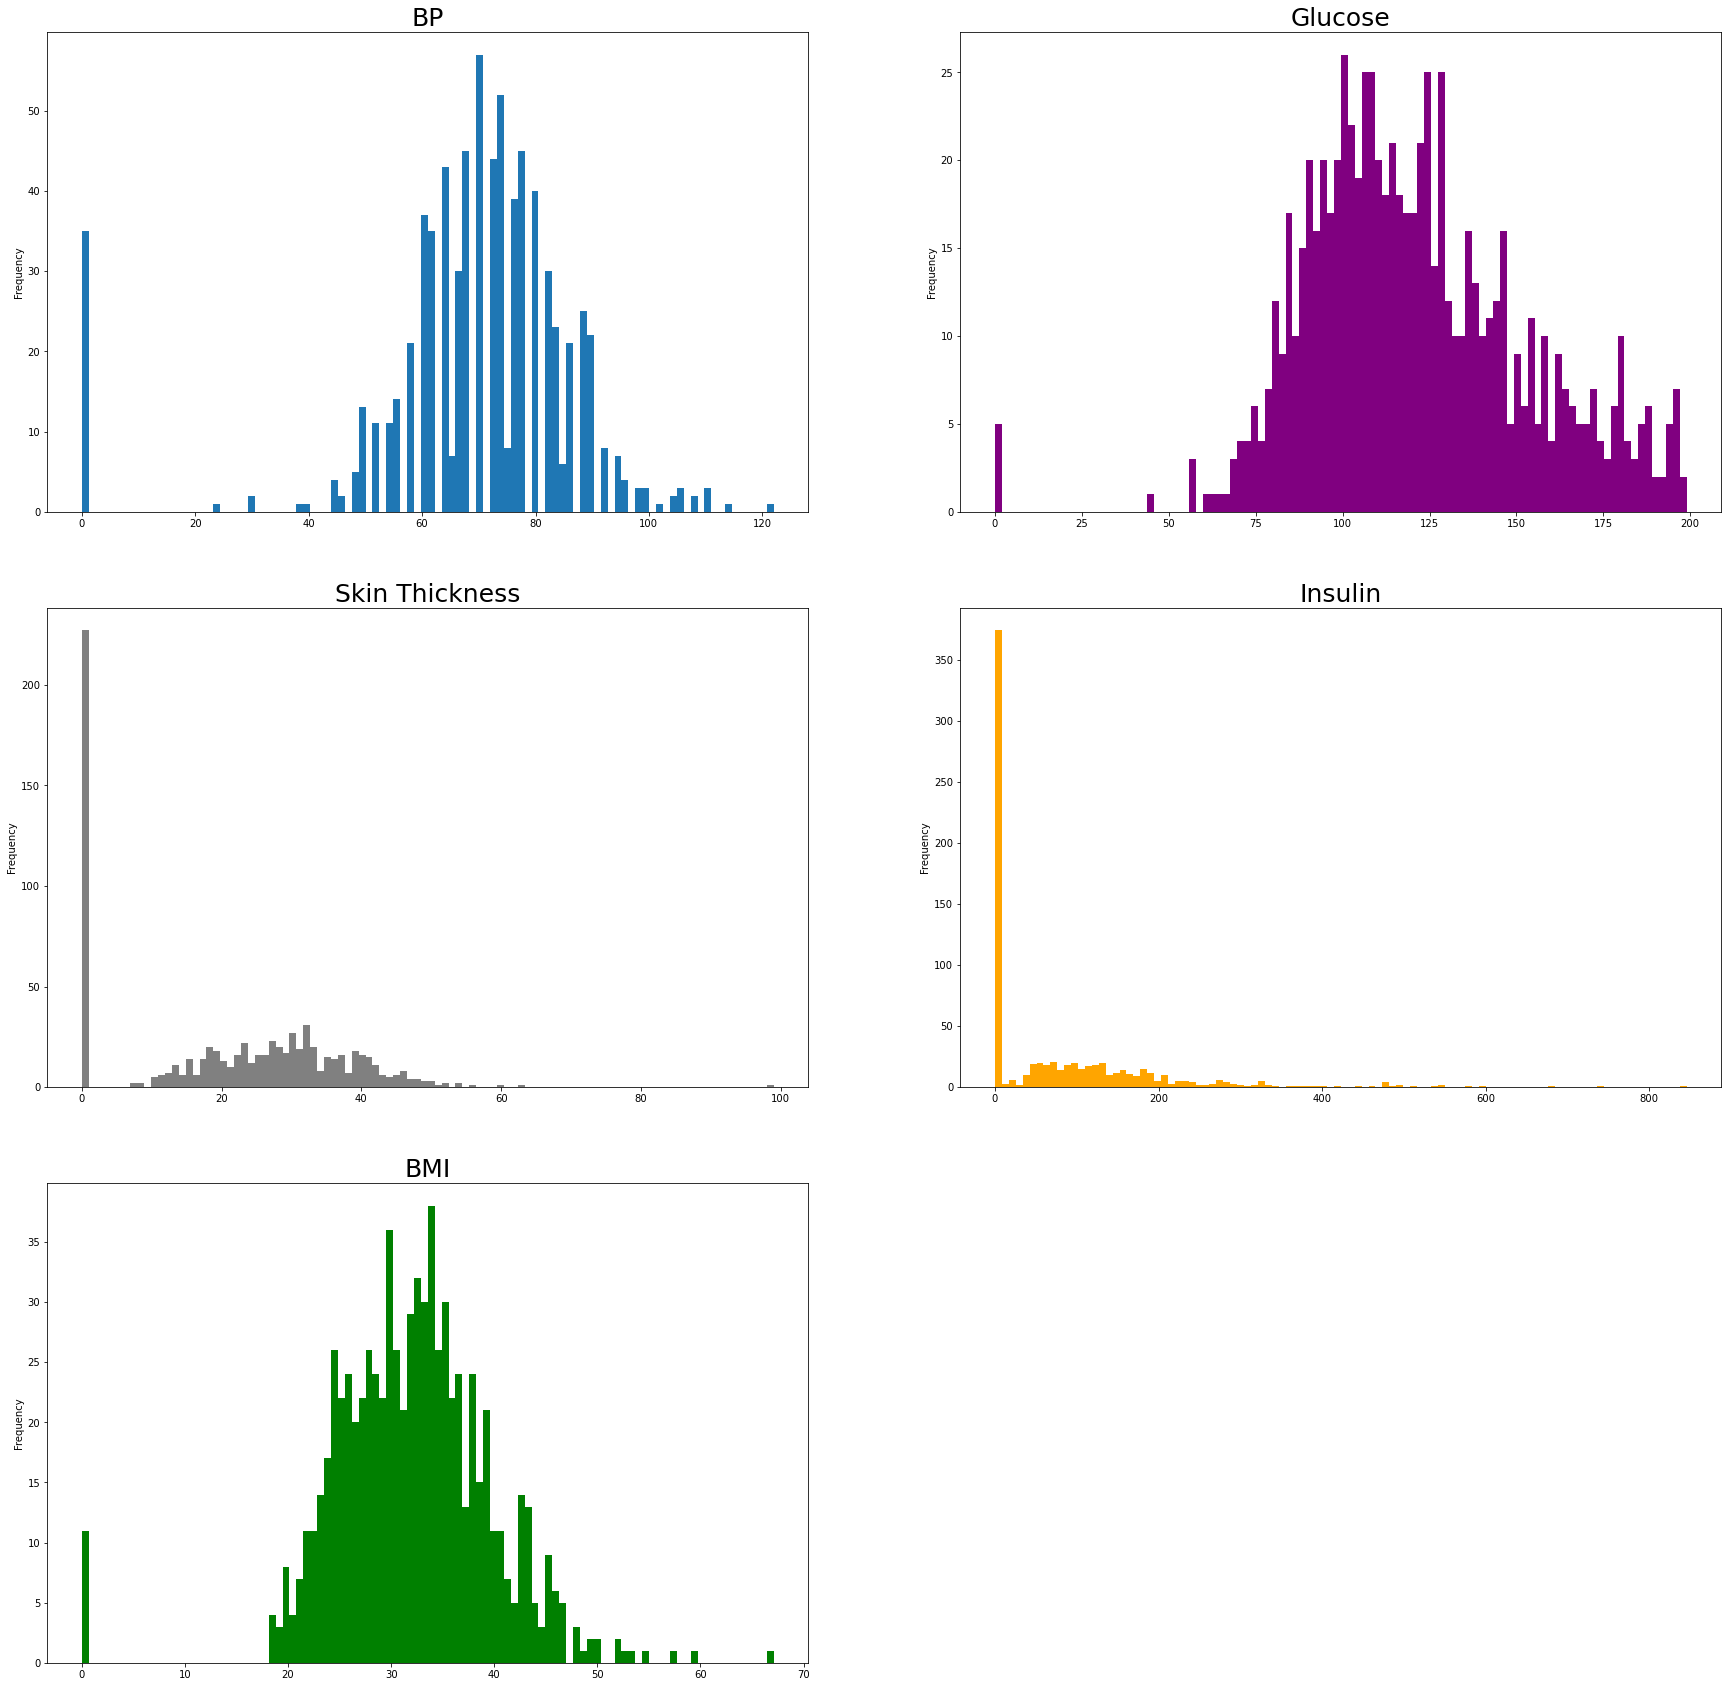

In [5]:
plt.figure(figsize=(30,30))
plt.subplot(3,2,1)
Df['BloodPressure'].plot(kind='hist',bins=100)
plt.title('BP',fontsize=25)

plt.subplot(3,2,2)
Df['Glucose'].plot(kind='hist',bins=100,color='Purple')
plt.title('Glucose',fontsize=25)

plt.subplot(3,2,3)
Df['SkinThickness'].plot(kind='hist',bins=100,color='Grey')
plt.title('Skin Thickness',fontsize=25)

plt.subplot(3,2,4)
Df['Insulin'].plot(kind='hist',bins=100,color='orange')
plt.title('Insulin',fontsize=25)

plt.subplot(3,2,5)
Df['BMI'].plot(kind='hist',bins=100,color='green')
plt.title('BMI',fontsize=25)

plt.show()


### Finding the Average of each column

In [6]:
BpAvg=Df['BloodPressure'].mean()
GlucoseAvg=Df['Glucose'].mean()
SkinThicknessAvg=Df['SkinThickness'].mean()
InsulinAvg=Df['Insulin'].mean()
BMIAvg=Df['BMI'].mean()

print(BpAvg)
print(GlucoseAvg)
print(SkinThicknessAvg)
print(InsulinAvg)
print(BMIAvg)


69.10546875
120.89453125
20.536458333333332
79.79947916666667
31.992578124999977


### Converting Int and Float to Object for replacing the '0' values with the mean.

In [7]:
Df['BloodPressure']=Df['BloodPressure'].map(str)
Df['Glucose']=Df['Glucose'].map(str)
Df['SkinThickness']=Df['SkinThickness'].map(str)
Df['Insulin']=Df['Insulin'].map(str)
Df['BMI']=Df['BMI'].map(str)

In [8]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    object 
 2   BloodPressure             768 non-null    object 
 3   SkinThickness             768 non-null    object 
 4   Insulin                   768 non-null    object 
 5   BMI                       768 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


### Replacing '0' with the Average

In [9]:
Df['BloodPressure']=Df['BloodPressure'].replace('0',BpAvg)
Df['Glucose']=Df['Glucose'].replace('0',GlucoseAvg)
Df['SkinThickness']=Df['SkinThickness'].replace('0',SkinThicknessAvg)
Df['Insulin']=Df['Insulin'].replace('0',InsulinAvg)
Df['BMI']=Df['BMI'].replace('0',BMIAvg)

### Converting again Object type to Int & Float for Model training

In [10]:
Df['BloodPressure']=Df['BloodPressure'].map(int)
Df['Glucose']=Df['Glucose'].map(int)
Df['SkinThickness']=Df['SkinThickness'].map(int)
Df['Insulin']=Df['Insulin'].map(int)
Df['BMI']=Df['BMI'].map(float)

In [11]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Correlation among the variables

In [12]:
correlation=Df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.017683,-0.033523,0.544341,0.221898
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.235123,0.137158,0.266673,0.492884
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.242947,0.000471,0.326791,0.162879
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.499700,0.157196,0.020582,0.171857
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189561,0.158243,0.037676,0.178696
BMI,0.017683,0.235123,0.242947,0.499700,0.189561,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.492884,0.162879,0.171857,0.178696,0.292695,0.173844,0.238356,1.000000


Text(0, 0.5, 'BMI')

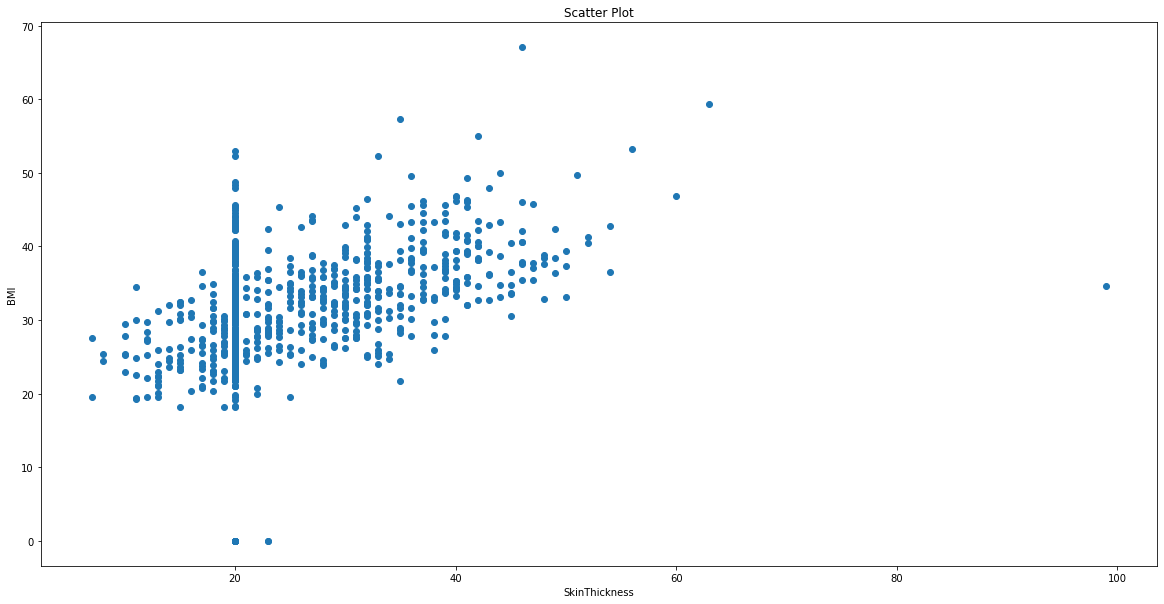

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(Df['SkinThickness'],Df['BMI'])
plt.title('Scatter Plot')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')


### We can conclude that more the BMI, more the Skin Thickness

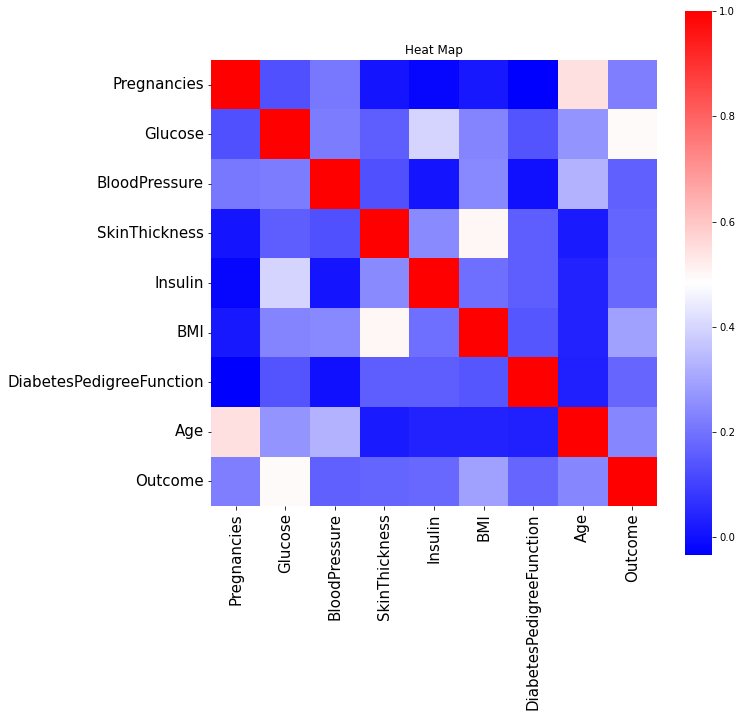

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation,square=True,cmap='bwr')
plt.yticks(size=15,rotation=0)
plt.xticks(size=15,rotation=90)
plt.title('Heat Map')

plt.show()

### Model Building

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [16]:
X=Df.drop('Outcome',axis=1)
y=Df['Outcome']

In [17]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=15)

In [18]:
svc=SVC()

In [19]:
svc.fit(Xtrain,ytrain)

SVC()

In [20]:
ypredicted=svc.predict(Xtest)

In [21]:
metrics.confusion_matrix(ytest,ypredicted) 

array([[142,  18],
       [ 35,  36]], dtype=int64)

In [22]:
pd.crosstab(ytest, ypredicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,18,160
1,35,36,71
All,177,54,231


In [23]:
metrics.accuracy_score(ytest,ypredicted)

0.7705627705627706

In [24]:
print(classification_report(ytest, ypredicted))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       160
           1       0.67      0.51      0.58        71

    accuracy                           0.77       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



### We can conclude that our model test accuracy is not bad. Now we will check if the model is generalised or not.

In [25]:
ytrainpred=svc.predict(Xtrain)

In [26]:
metrics.accuracy_score(ytrain,ytrainpred)

0.7616387337057728

#### From the above test we saw that the model is working fine and has got Low Bias and Low Variance.

In [27]:
fpr, tpr, _ = metrics.roc_curve(ytest, ypredicted)

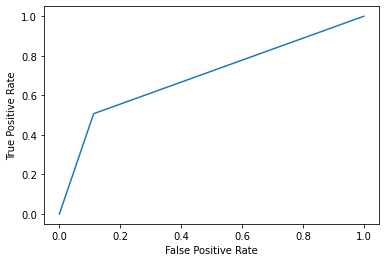

In [28]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC curve shows the best threshold value for the classification

## Lets try to build the Logistic Regression model and check whether it will give more accuracy or not 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
lr.fit(Xtrain,ytrain)

C:\Users\NAVAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
ypred=lr.predict(Xtest)

In [33]:
metrics.accuracy_score(ytest,ypred)

0.7575757575757576

In [34]:
metrics.confusion_matrix(ytest,ypred) 

array([[136,  24],
       [ 32,  39]], dtype=int64)

In [35]:
pd.crosstab(ytest, ypred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,24,160
1,32,39,71
All,168,63,231


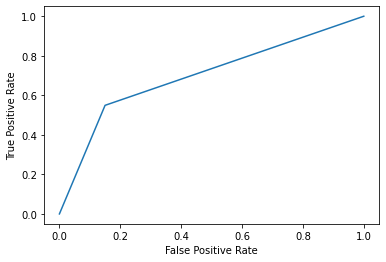

In [36]:
fpr, tpr, _ = metrics.roc_curve(ytest, ypred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### We will go for the SVM model as it gave us more accuracy

# KMeans Clustering

In [37]:
from sklearn.cluster import KMeans

C:\Users\NAVAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


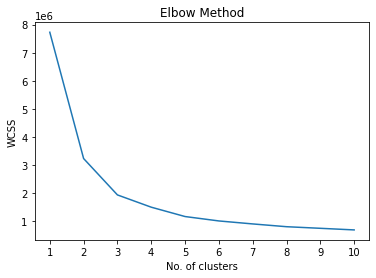

In [38]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()


## With the help of elbow method we concluded that we should use 2 clusters

In [39]:
clusters=KMeans(n_clusters=2,random_state=0)

In [40]:
clusters.fit(Xtrain,ytrain)

KMeans(n_clusters=2, random_state=0)

In [41]:
yknn=clusters.predict(Xtest)

In [42]:
metrics.accuracy_score(ytest,yknn)

0.7186147186147186

In [43]:
metrics.confusion_matrix(ytest,yknn) 

array([[152,   8],
       [ 57,  14]], dtype=int64)

In [44]:
pd.crosstab(ytest, yknn, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,152,8,160
1,57,14,71
All,209,22,231


#### We are getting higher TN but lower TP from KNN clustering as compared to the SVM model

In [45]:
print(classification_report(ytest, yknn))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       160
           1       0.64      0.20      0.30        71

    accuracy                           0.72       231
   macro avg       0.68      0.57      0.56       231
weighted avg       0.70      0.72      0.66       231



In [46]:
Df.to_csv(r'C:\Users\NAVAL\Downloads\Healthcare_diabetes.csv')

### Converting the preprocessed dataframe to CSV file for Tableau Visualization.